________________________________________
_____________________________________
<h3>Collecting parameters</h3>

Statements:

    y can be in k conditions. yEk
    
    n - number of parameters
    
    m - number of samples in training set
    
The functions collect parameters X0....Xn with y answer from the training dataset.

Also, averaging samples for each answer y, "etalon" signal and envelope can be made.

Corelation coefficients from corellations of samples to this ethalon are elso parameters.

Thus, we have parameters to check:

1. Signal duration

2. Signal amplitude

4. Peak freq by differential of psd trace (to do)

5. - 5+k. Corellation with psd of ethalon for every state y can be in

5+k. - 5+2k. Corellation with signal timeserie of ethalon for every state y can be in

That's a lot of parameters.

What to do next?
<h3>PCA - Principle component analysis.</h3>
<b>sklearn</b> module:

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import classification_report
  
X_train, X_test, y_train, y_test = train_test_split(X, y)

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [55]:
import scipy.io.wavfile as wv
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy.fftpack as fftp
import pandas as pd
from shutil import copy
import scipy.signal as ss

In [56]:
#function for separ first number from filename
def separ_number_from_filename(filename_string):
    for i in range(len(filename_string)):
        if not filename_string[i].isdigit():
            pos = i
            break
    return str(int(filename_string[:pos])) 

#defines where signal starts to differ from noise, by treashold. Goes along the signal with tapper
def start_end_definer (data,SampleRate, tr):
    data_f=low_pass_filt(data, SampleRate, f_cutoff=1000)
    data_f = np.absolute(data_f)
    envel = np.abs(ss.hilbert(data_f))
    sig = np.where(envel>envel.std()*tr)

    start = sig[0][0]
    end = sig[0][len(sig[0])-1]
    dur =end-start
    margin = int(dur/10)
    return (start, end)

#puts files with numbers in number-named folders
def folder_putter(path, Num):
    Num = str(Num)
    #check is //on the end of path 
    if (path[:-2]!='\\'): path = path+'\\'
    #check is folder exists, if not - create
    if (os.path.isdir(path+Num)==0):
        os.mkdir(path+Num)
    #find files starting that number and copy it in their folder
    filelist = os.listdir(path)
    for file in filelist:
        if (separ_number_from_filename(file)==Num) and os.path.isfile(path+Num+'\\'+file)==0 and file.endswith(".wav"):
            copy(path+file, path+Num+'\\'+file)
    return 0
   

def low_pass_filt(data, sample_rate, f_cutoff):
    Wn = f_cutoff / (sample_rate/2)
    b, a = ss.iirfilter(1, Wn, ftype='butter', btype='low')
    return ss.filtfilt(b, a, data) #filtering


def corell_signals(signal1,signal2):
    cor_matr = np.corrcoef(signal1,signal2)
    return float(cor_matr[0][1])
    


0 file=  0-10_06_2019--22_03_30.wav
1 file=  0-11_06_2019--07_21_41.wav
2 file=  00_00c1b12173.wav


C:\Users\verat\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in short_scalars


3 file=  00_064009241a.wav
4 file=  00_0666098465.wav
5 file=  00_07c3627a21.wav
6 file=  00_0a3c709caa.wav
7 file=  00_0c447806b3.wav
8 file=  00_0c68680041.wav
9 file=  00_139360572a.wav
10 file=  00_153b017510.wav
11 file=  00_18b81c457a.wav
12 file=  00_23b7ab7252.wav
13 file=  00_2979a24a25.wav
14 file=  00_2992ca6950.wav
15 file=  00_2b070a32a8.wav
16 file=  00_2b668967a8.wav
17 file=  00_2c920018bb.wav
18 file=  00_3cb3738708.wav
19 file=  00_402a02ca59.wav
20 file=  00_506534a894.wav
21 file=  00_56b1583696.wav
22 file=  00_5719c38013.wav
23 file=  00_5738176457.wav
24 file=  00_5783824900.wav
25 file=  00_57aa695446.wav
26 file=  00_5868886324.wav
27 file=  00_5b18a44463.wav
28 file=  00_6057878849.wav
29 file=  00_615104298a.wav
30 file=  00_66a1550b08.wav
31 file=  00_6776c0b596.wav
32 file=  00_715ccb4bcb.wav
33 file=  00_736488714b.wav
34 file=  00_75975771ca.wav
35 file=  00_7848934073.wav
36 file=  00_7899937504.wav
37 file=  00_7aab6b11ac.wav
38 file=  00_8378a60074.wav

290 file=  05_5832046b50.wav
291 file=  05_5a060b1080.wav
292 file=  05_5c6c946098.wav
293 file=  05_620a81c69b.wav
294 file=  05_6224c0b968.wav
295 file=  05_64017b28b0.wav
296 file=  05_6733905b7b.wav
297 file=  05_6a67701747.wav
298 file=  05_6b5896a596.wav
299 file=  05_7177c02352.wav
300 file=  05_7410a1a65a.wav
301 file=  05_7c1aa86755.wav
302 file=  05_80271bc995.wav
303 file=  05_8cc27b3982.wav
304 file=  05_905c30067c.wav
305 file=  05_91770274ba.wav
306 file=  05_92bc953918.wav
307 file=  05_949ca66534.wav
308 file=  05_97154a1859.wav
309 file=  05_9a77b5a549.wav
310 file=  05_a8a50a4982.wav
311 file=  05_a98b16575b.wav
312 file=  05_aa49344497.wav
313 file=  05_ab3ac79b1a.wav
314 file=  05_b1016b532b.wav
315 file=  05_b24278378b.wav
316 file=  05_b3b186a40c.wav
317 file=  05_b696b6603a.wav
318 file=  05_b7bb4a0878.wav
319 file=  05_b82bc370b4.wav
320 file=  05_ba0170a386.wav
321 file=  05_c1879a9a78.wav
322 file=  05_c3cb374407.wav
323 file=  05_c59c567c6b.wav
324 file=  05_

573 file=  10_7463cb07c3.wav
574 file=  10_799b4c9811.wav
575 file=  10_80c6219452.wav
576 file=  10_8167c370c6.wav
577 file=  10_8339c94575.wav
578 file=  10_8a5ba705b2.wav
579 file=  10_8ca4595c68.wav
580 file=  10_9254563621.wav
581 file=  10_99a11c7a17.wav
582 file=  10_9aa2093a96.wav
583 file=  10_9acbabbbb0.wav
584 file=  10_9bb49ba2a4.wav
585 file=  10_a0a68993c3.wav
586 file=  10_a169144267.wav
587 file=  10_b163617b54.wav
588 file=  10_b290a48b8b.wav
589 file=  10_c20b472846.wav
590 file=  10_c33b598001.wav
591 file=  10_c510649058.wav
592 file=  10_c5a1799438.wav
593 file=  11-09_06_2019--14_37_22.wav
594 file=  11-10_06_2019--22_02_53.wav
595 file=  11-10_06_2019--22_11_11.wav
596 file=  11-10_06_2019--22_11_18.wav
597 file=  11-11_06_2019--07_21_35.wav
598 file=  11-11_06_2019--07_21_46.wav
599 file=  11_00696a8151.wav
600 file=  11_074370a674.wav
601 file=  11_08cca30b2c.wav
602 file=  11_0a78649368.wav
603 file=  11_0b395c663a.wav
604 file=  11_0c92b22ab6.wav
605 file=  1

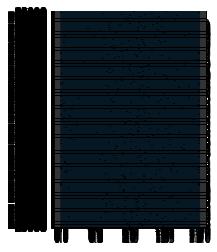

In [57]:
#creating Pandas with 'Filename', 'Signal_start', 'Signal_end','y_number' for each file, plottint signal and power spec
path = 'C:\\Users\\verat\\Desktop\\SpeechRecognition\\samples\\'
filelist = os.listdir(path)
N_samples = len(filelist) #how many wav files
for file in filelist:
    if not ('.wav' in file):
        filelist.remove(file)
win_num = len(filelist)+1
pd_Parameters = pd.DataFrame(columns = ['Filename', 'Signal_start', 'Signal_end','Signal_ampl','y_number',
                                        'resam_Signal', 'resam_Envelope',
                                        'Corell_Coef_Vector_Ampl','Corell_Coef_Vector_Envel'])
pd_Parameters['Filename']=filelist
for i in range(N_samples):

    file = filelist[i]
    print (i, 'file= ', file)
    speech_num = separ_number_from_filename(file)
    pd_Parameters.at[i,'y_number']=speech_num
    SampleRate,data = wv.read(path+file)
    if len(data.shape)==1:
        signal_ampl = data[:]
    else:
        signal_ampl = data[:,0]
    time = np.linspace(0, len(signal_ampl)/SampleRate, len(signal_ampl))
    
    plt.subplot(win_num,2,i*2+1)
    plt.plot(time,signal_ampl)
    (start, end) = start_end_definer(signal_ampl,SampleRate,1.5)
    start_s = start/SampleRate
    end_s= end/SampleRate
    pd_Parameters.at[i,'Signal_start']=start_s
    pd_Parameters.at[i,'Signal_end']=end_s
    plt.axvline(start_s, color='k')
    plt.axvline(end_s, color='k')
    sign= signal_ampl[int(start):int(end)]
    pd_Parameters.at[i,'Signal_ampl']=np.max(sign)-np.min(sign)
    pd_Parameters.at[i,'resam_Signal']= ss.resample(sign/max(sign),1000) #nomalized and resampled signal
    f_cutoff=10000
    if SampleRate>=f_cutoff:
        signal_ampl_f = low_pass_filt(sign, SampleRate, f_cutoff)
    else:
        signal_ampl_f = sign
    envel = np.abs(ss.hilbert(np.absolute(signal_ampl_f))) #envelope of absolute signal
    envel =envel/np.max(envel)   #normalized
    pd_Parameters.at[i,'resam_Envelope']=ss.resample(envel,1000) #resampled envelope
    
pd_Parameters['Duration']=pd_Parameters['Signal_end']-pd_Parameters['Signal_start']
pd_Parameters.to_csv('pd_Parameters.csv')

In [58]:
# creates avereged signal, envelop and power for each number from its files
pd_Aver_Parameters = pd.DataFrame(columns = ['Aver_Signal','Aver_Envelope'])
for ind in range(12+1):
    pd_Aver_Parameters.at[ind,'Aver_Signal']=pd_Parameters.loc[pd_Parameters.index[pd_Parameters['y_number']==str(ind)]]['resam_Signal'].mean()
    pd_Aver_Parameters.at[ind,'Aver_Envelope']=pd_Parameters.loc[pd_Parameters.index[pd_Parameters['y_number']==str(ind)]]['resam_Envelope'].mean()
pd_Aver_Parameters   

,Aver_Signal,Aver_Envelope
0,"[0.0073202698111759215, 0.010167289153696918, ...","[0.06751151878616515, 0.053376094979589395, 0...."
1,"[-0.00222410565605373, -0.017177589434182173, ...","[0.07190151216590289, 0.06029733001251986, 0.0..."
2,"[0.000755562590039122, -0.007719596279218129, ...","[0.08974737409882191, 0.0904865920022513, 0.08..."
3,"[-0.0003156541941900615, 0.004259097678247682,...","[0.06401901388626156, 0.049880788784854795, 0...."
4,"[0.0074638020557237705, -0.0017238263580517594...","[0.08183159187044077, 0.06110674344321264, 0.0..."
5,"[0.008525862953194302, -0.00842966751583648, -...","[0.07092688276581587, 0.05961356098522591, 0.0..."
6,"[-0.00435300700777899, 0.00753594229037309, -0...","[0.07318305167910451, 0.05588158132554407, 0.0..."
7,"[-0.003728588602766615, -0.005938385289465698,...","[0.06537363458530765, 0.06402597757801237, 0.0..."
8,"[-0.01031302156889077, -0.0074016943999780475,...","[0.07812169744800775, 0.061175370393790125, 0...."
9,"[0.0053997882238732125, 0.0029397355659154184,...","[0.044715226094319195, 0.038744076834010883, 0..."


Text(0.5, 1.0, 'aver envelope')

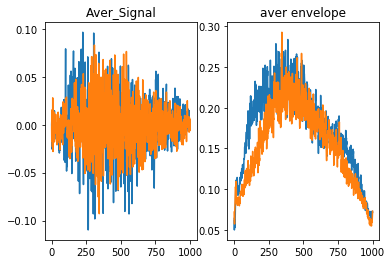

In [59]:
# Visualizing averaged template signals, how similar they are to each other?
#put numbers to compare to see them superimposed:
Templ_to_compare1 = 3
Templ_to_compare2 = 1

plt.subplot(1,2,1)
plt.plot(pd_Aver_Parameters.loc[Templ_to_compare1]['Aver_Signal'])
plt.plot(pd_Aver_Parameters.loc[Templ_to_compare2]['Aver_Signal'])
plt.title('Aver_Signal')
plt.subplot(1,2,2)
plt.plot(pd_Aver_Parameters.loc[Templ_to_compare1]['Aver_Envelope'])
plt.plot(pd_Aver_Parameters.loc[Templ_to_compare2]['Aver_Envelope'])
plt.title('aver envelope')


In [60]:
#quantifies corellation coef-nts for each sample to each template, and puts it as a list to pd_Parameters dataframe
pd_Aver_Parameters.fillna(0)
pd_Parameters.fillna(0)
for i in range(len(pd_Parameters)):
    Vect_Amp = []
    Vect_Envel = []
    for number in range(12+1):
        Vect_Amp.append(corell_signals(pd_Parameters['resam_Signal'][i],pd_Aver_Parameters['Aver_Signal'][number]))
        Vect_Envel.append(corell_signals(pd_Parameters['resam_Envelope'][i],pd_Aver_Parameters['Aver_Envelope'][number]))
        
    pd_Parameters.at[i,'Corell_Coef_Vector_Ampl']=Vect_Amp
    pd_Parameters.at[i,'Corell_Coef_Vector_Envel']=Vect_Envel
pd_Parameters.to_csv('pd_Parameters.csv')

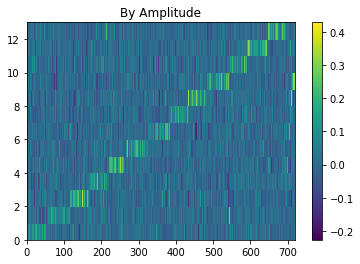

In [61]:
# Visualizes corellation for amplitude/time
z = np.zeros((12+1,(N_samples))) 
for i in range(12+1):
    for j in range(N_samples):
        z[i][j] = pd_Parameters['Corell_Coef_Vector_Ampl'].values[j][i]
        
fig, ax = plt.subplots()
im = ax.pcolormesh(z)
fig.colorbar(im)
plt.title('By Amplitude')
plt.show()

Text(0.5, 1.0, 'By Envelope')

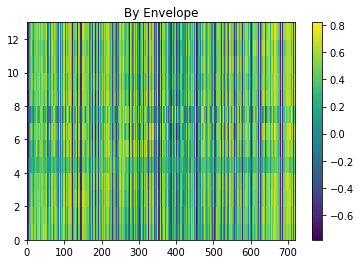

In [62]:
z = np.zeros((12+1,(N_samples-1)))
for i in range(12+1):
    for j in range(N_samples-1):
        z[i][j] = pd_Parameters['Corell_Coef_Vector_Envel'].values[j][i]
        
fig, ax = plt.subplots()
im = ax.pcolormesh(z)
fig.colorbar(im)
plt.title('By Envelope')

Corellation with Amplitude/time is promissing

using SKlearn

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report


In [64]:
#preparing nice numpy array X - matrix of parameters 
Params = pd_Parameters.copy()
Params = Params.drop(['Filename', 'Signal_start', 'Signal_end','y_number','resam_Signal', 'resam_Envelope'], axis=1)

X=Params[list(Params)[0]].values #copy first Amplitude column without changes
X = np.c_[X,Params[list(Params)[-1]].values] #duration goes next

#next 3 columns have lists as elements, needed to subdivide by separate columns
Params_names = list(Params)[1:-1]
for Colmn in Params_names:
    for j in range(12+1):
        Xtemp = []
        for i in range(N_samples):
            Xtemp.append(Params[Colmn].values[i][j])
        X = np.c_[X, Xtemp]
        
# y - numbers were saying, got them by parsing file names
y= list(pd_Parameters['y_number'])

X -final matrix of parameters pulled from data.

X[:,0] - amplitudes from min to max

X[:,1] - duration of speech, "silent" time before and after cut-off

X[:,1:14] - corellation coefficients between normalized amplitude/time curve of a signal from file and average ampl/time curves of numbers as templates. Each testing wav file has 13 of them - one for each template

X[:,15:27] - corellation coefficients for envelope/time curves (same idea, but envelope instead of just bold amplitude)



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)



Text(0, 0.5, 'y_pred')

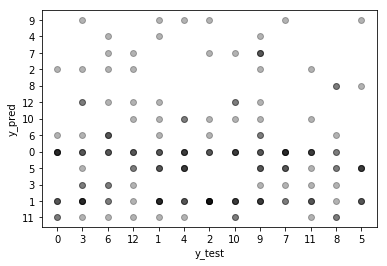

In [75]:
plt.scatter(y_test,y_pred, color = 'k',alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_pred')

<h3> Conclusion </h3>

KNeighborsClassifier doesn't predict

Text(0, 0.5, 'y_pred')

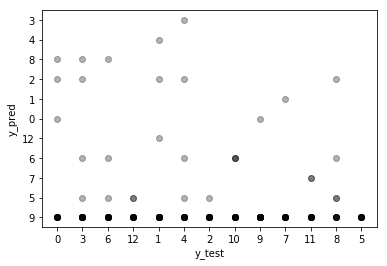

In [76]:
from sklearn.gaussian_process import GaussianProcessClassifier
classifier = GaussianProcessClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plt.scatter(y_test,y_pred, color = 'k', alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_pred')

everything is 9